In [21]:
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [53]:
dataset= pd.read_csv('dataset_labels.csv')
dataset

,Unnamed: 0,id,datetime,machine,temp,speed,rms_velocity_x,rms_velocity_y,rms_velocity_z,rms_Acceleration_x,rms_Acceleration_y,rms_Acceleration_z,created_on,updated_on,label_x,label_y,label_z
0,0,5385,01-03-2022 00:00,Drumming 4,41.56,27.94,4.41,3.94,1.61,98.72,87.96,37.63,17-03-2022 11:00,27-07-2022 09:03,1,1,0
1,1,5386,01-03-2022 00:01,Drumming 4,41.44,27.94,4.26,3.81,1.61,95.29,85.17,37.43,17-03-2022 11:00,27-07-2022 09:03,1,1,0
2,2,5387,01-03-2022 00:02,Drumming 4,41.31,28.00,4.09,3.74,1.58,91.15,83.66,36.84,17-03-2022 11:00,27-07-2022 09:03,1,1,0
3,3,5388,01-03-2022 00:03,Drumming 4,41.19,27.97,3.89,3.66,1.54,86.73,82.04,35.68,17-03-2022 11:00,27-07-2022 09:03,1,1,0
4,4,5389,01-03-2022 00:04,Drumming 4,41.06,27.97,3.70,3.50,1.64,82.13,77.90,37.74,17-03-2022 11:00,27-07-2022 09:03,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157658,300630,318703,11-12-2022 05:51,Drumming 4,41.06,33.96,5.19,5.86,3.42,110.29,124.16,72.60,11-12-2022 06:18,11-12-2022 06:18,1,1,1
157659,300631,318704,11-12-2022 05:52,Drumming 4,40.94,33.96,5.32,5.96,3.46,113.21,126.45,73.34,11-12-2022 06:18,11-12-2022 06:18,1,1,1
157660,300632,318705,11-12-2022 05:53,Drumming 4,40.88,33.99,5.28,5.97,3.43,112.42,126.81,72.83,11-12-2022 06:18,11-12-2022 06:18,1,1,1
157661,300633,318706,11-12-2022 05:54,Drumming 4,40.69,33.96,5.48,6.17,3.62,116.76,131.37,77.01,11-12-2022 06:18,11-12-2022 06:18,1,1,1


In [54]:
# dataset.drop(columns=['Unnamed: 0'])

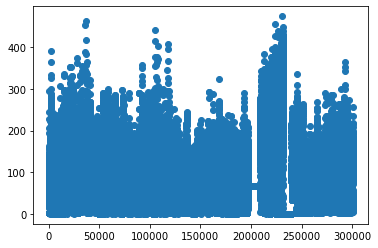

In [76]:
# plot relationship between speed and acceleration

import matplotlib.pyplot as plt
plt.scatter(dataset['Unnamed: 0'], dataset['rms_Acceleration_x'])
plt.show()

In [60]:
X = dataset.iloc [:,5:6].values
y= dataset.iloc[:,9:12].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [77]:
# model= LinearRegression()
# model.fit(X_train, y_train)

poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y_train)

X_test_poly = poly_reg.fit_transform(X_test)
y_pred = lin_reg.predict(X_test_poly)

In [78]:
df = pd.DataFrame (y_test)
df

,0,1,2
0,90.52,90.98,56.85
1,34.77,38.29,22.33
2,31.12,39.76,19.63
3,47.24,56.23,33.70
4,201.73,187.45,87.18
...,...,...,...
31528,55.01,57.18,37.42
31529,52.83,57.18,36.78
31530,27.70,29.30,19.82
31531,99.63,140.45,55.89


In [79]:
df1 = pd.DataFrame (y_pred)
df1

,0,1,2
0,82.653663,75.144331,42.121344
1,93.389868,94.816688,49.428236
2,79.864071,82.553799,46.161453
3,102.508710,105.025021,52.606464
4,102.508710,105.025021,52.606464
...,...,...,...
31528,79.736010,82.392085,46.109040
31529,79.864071,82.553799,46.161453
31530,79.864071,82.553799,46.161453
31531,84.666814,87.426117,47.563636


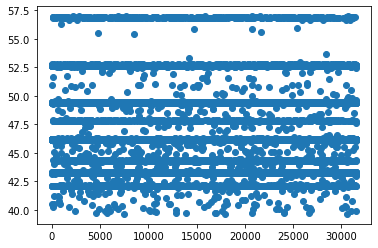

In [80]:
plt.scatter(x=df1.index, y= df1.iloc[:,2:3])
plt.show()

In [52]:
dataset.speed[8955]

30.0

In [4]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

# Input data
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10]])
y = np.array([11, 12, 13, 14, 15])

# Create the model
model = Sequential()
model.add(Dense(32, input_dim=2, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X, y, epochs=100, batch_size=10)

# Make predictions
predictions = model.predict(X)

print(predictions)


Epoch 1/100
1/1 [==============================] - 0s 147ms/step - loss: 143.0117
Epoch 2/100
1/1 [==============================] - 0s 966us/step - loss: 141.5509
Epoch 3/100
1/1 [==============================] - 0s 834us/step - loss: 140.0866
Epoch 4/100
1/1 [==============================] - 0s 777us/step - loss: 138.6288
Epoch 5/100
1/1 [==============================] - 0s 819us/step - loss: 137.1595
Epoch 6/100
1/1 [==============================] - 0s 806us/step - loss: 135.6950
Epoch 7/100
1/1 [==============================] - 0s 782us/step - loss: 134.2306
Epoch 8/100
1/1 [==============================] - 0s 787us/step - loss: 132.7733
Epoch 9/100
1/1 [==============================] - 0s 724us/step - loss: 131.3237
Epoch 10/100
1/1 [==============================] - 0s 753us/step - loss: 129.8846
Epoch 11/100
1/1 [==============================] - 0s 680us/step - loss: 128.4533
Epoch 12/100
1/1 [==============================] - 0s 1ms/step - loss: 127.0423
Epoch 13/100
1/

 [12.26388  ]]
